# Plot 3D power and forecasted errorbars

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import forecast as fc
import decimal

Populating the interactive namespace from numpy and matplotlib


In [2]:
# get file with QSO LF
qlf_file='../data/nzr_qso.dat'
# get list of files with quasar SNR
snr_file_base='../data/sn-spec-lya-20180907-r'
snr_file_end='-t4000-nexp4.dat'
snr_files=[snr_file_base+'19.25'+snr_file_end,snr_file_base+'19.75'+snr_file_end,snr_file_base+'20.25'+snr_file_end,snr_file_base+'20.75'+snr_file_end,snr_file_base+'21.25'+snr_file_end,snr_file_base+'21.75'+snr_file_end,snr_file_base+'22.25'+snr_file_end,snr_file_base+'22.75'+snr_file_end,snr_file_base+'23.25'+snr_file_end]

In [3]:
forecast = fc.FisherForecast(snr_filenames=snr_files,dndzdmag_filename=qlf_file)

reading ../data/nzr_qso.dat in QuasarLF:_setup_YecheFile
WARNING!!! assume dz=0.2, dm=0.5
In S/N files:
pass-band for magnitudes = r
Nexp in file             = 4
Redshifts                = [2.   2.25 2.5  2.75 3.   3.25 3.5  3.75 4.   4.25 4.5  4.75]
Magnitudes               = [19.25 19.75 20.25 20.75 21.25 21.75 22.25 22.75 23.25]
reading mag=19.25 in ../data/sn-spec-lya-20180907-r19.25-t4000-nexp4.dat
reading mag=19.75 in ../data/sn-spec-lya-20180907-r19.75-t4000-nexp4.dat
reading mag=20.25 in ../data/sn-spec-lya-20180907-r20.25-t4000-nexp4.dat
reading mag=20.75 in ../data/sn-spec-lya-20180907-r20.75-t4000-nexp4.dat
reading mag=21.25 in ../data/sn-spec-lya-20180907-r21.25-t4000-nexp4.dat
reading mag=21.75 in ../data/sn-spec-lya-20180907-r21.75-t4000-nexp4.dat
reading mag=22.25 in ../data/sn-spec-lya-20180907-r22.25-t4000-nexp4.dat
reading mag=22.75 in ../data/sn-spec-lya-20180907-r22.75-t4000-nexp4.dat
reading mag=23.25 in ../data/sn-spec-lya-20180907-r23.25-t4000-nexp4.dat


In [4]:
# define binning for plots
kmin_hMpc=0.01
kmax_hMpc=1.0
ks_hMpc=np.linspace(kmin_hMpc,kmax_hMpc,100)
Nk=len(ks_hMpc)
dk_hMpc=ks_hMpc[1]-ks_hMpc[0]
print('Nk =',Nk)
print('dk =',dk_hMpc)

Nk = 100
dk = 0.01


In [5]:
def z_str(z):
    return "{:.3g}".format(decimal.Decimal(z))

In [6]:
def mu_str(mu):
    return "{:.2g}".format(decimal.Decimal(mu))

In [7]:
forecast.verbose=1
forecast.lmin=3701.0
forecast.lmax=3901.0
P1=forecast.TotalFluxP3D_degkms(10.0,0.001)
print('P_T',P1)
np_eff,Pw2D,PN_eff=forecast.EffectiveDensityAndNoise()
P2=forecast.TotalFluxP3D_degkms(10.0,0.001,Pw2D=Pw2D,PN_eff=PN_eff)
print('P_T',P2)

lc, lrc, zq = 3799.68432899366 1087.1982339941508 2.4949323961228056
I1, I2, I3 = 0.0003828453708190594 0.00026124828826793985 7.293956680923876e-05
np_eff, Pw2D, PN_eff = 0.4532205531442522 0.030112752354941732 0.42036851739113884
P_T 1.22130075444083
lc, lrc, zq = 3799.68432899366 1087.1982339941508 2.4949323961228056
I1, I2, I3 = 0.0003828453708190594 0.00026124828826793985 7.293956680923876e-05
np_eff, Pw2D, PN_eff = 0.4532205531442522 0.030112752354941732 0.42036851739113884
P_T 1.22130075444083


### Plot fixed mu (0.8<mu<1.0), for different z

3501.0 <l< 3701.0
lc, lrc, zq = 3599.6112290079327 1087.1982339941508 2.3109060670414032
I1, I2, I3 = 4.8069919445484894e-05 1.160707814790371e-05 1.0557117024695758e-05
np_eff, Pw2D, PN_eff = 0.056906200626307045 0.08486330065370963 3.8593338680370572
3701.0 <l< 3901.0
lc, lrc, zq = 3799.68432899366 1087.1982339941508 2.4949323961228056
I1, I2, I3 = 0.0003828453708190594 0.00026124828826793985 7.293956680923876e-05
np_eff, Pw2D, PN_eff = 0.4532205531442522 0.030112752354941732 0.42036851739113884
3901.0 <l< 4101.0
lc, lrc, zq = 3999.750117194823 1087.1982339941508 2.6789519998579596
I1, I2, I3 = 0.0003069171905405099 0.00022646375898820374 5.4458633339619017e-05
np_eff, Pw2D, PN_eff = 0.3633351464291097 0.04061627425161447 0.48835778337612457
4101.0 <l< 4301.0
lc, lrc, zq = 4199.809638543156 1087.1982339941508 2.862965839370331
I1, I2, I3 = 0.0002852408341108611 0.00022819861354071215 4.5925311859915975e-05
np_eff, Pw2D, PN_eff = 0.337674211231749 0.04738418391549768 0.476806889792651

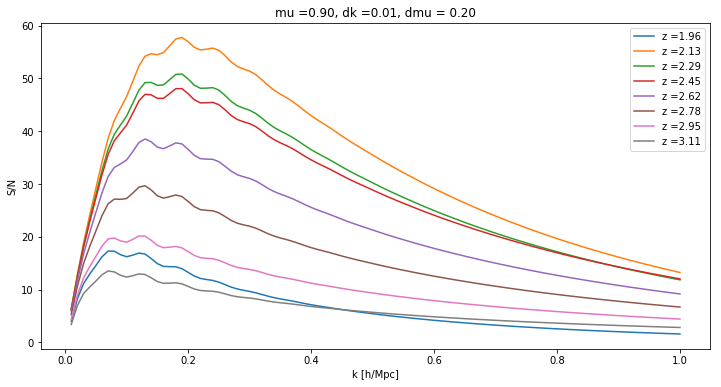

In [8]:
forecast.verbose=1
lmin=3501.0
lmax=3701.0
plt.figure(figsize=(12,6))
while lmin < 5000:
    print(lmin,'<l<',lmax)    
    forecast.lmin=lmin
    forecast.lmax=lmax
    z = forecast.mean_z()
    mu = 0.9
    dmu = 0.2
    P3D = np.array([forecast.FluxP3D_hMpc(k,mu) for k in ks_hMpc])
    np_eff,Pw2D,PN_eff=forecast.EffectiveDensityAndNoise()
    VarP3D = np.array([forecast.VarFluxP3D_hMpc(k,mu,dk_hMpc,dmu,Pw2D=Pw2D,PN_eff=PN_eff) for k in ks_hMpc])      
    plt.plot(ks_hMpc,P3D/np.sqrt(VarP3D),label='z ='+z_str(z))
    lmin = lmax 
    lmax += 200
plt.legend(loc='best')
plt.title('mu ='+mu_str(mu)+', dk ='+str(dk_hMpc)+', dmu = '+mu_str(dmu))
plt.xlabel('k [h/Mpc]')
plt.ylabel('S/N')
plt.savefig('LyaP3D_mu'+mu_str(mu)+'.pdf')

### Plot fixed z, for different mu


mus [0.1 0.3 0.5 0.7 0.9]
lc, lrc, zq = 3798.6839826445157 1087.1982339941508 2.494012282092203
I1, I2, I3 = 0.00037789487683524236 0.00025615683775952875 7.251574906147487e-05
np_eff, Pw2D, PN_eff = 0.44736005229273934 0.030304543358316866 0.4289474918599053


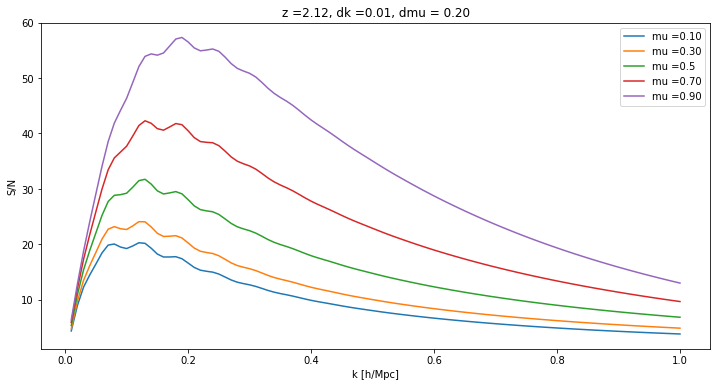

In [9]:
mus=np.linspace(0.1,0.9,5)
dmu=mus[1]-mus[0]
print('mus',mus)
forecast.lmin=3700.0
forecast.lmax=3900.0
z = forecast.mean_z()
np_eff,Pw2D,PN_eff=forecast.EffectiveDensityAndNoise()
plt.figure(figsize=(12,6))
for mu in mus:
    P3D = np.array([forecast.FluxP3D_hMpc(k,mu) for k in ks_hMpc])
    VarP3D = np.array([forecast.VarFluxP3D_hMpc(k,mu,dk_hMpc,dmu,Pw2D=Pw2D,PN_eff=PN_eff) for k in ks_hMpc])    
    plt.plot(ks_hMpc,P3D/np.sqrt(VarP3D),label='mu ='+mu_str(mu))
plt.legend(loc='best')
plt.title('z ='+z_str(z)+', dk ='+str(dk_hMpc)+', dmu = '+mu_str(dmu))
plt.xlabel('k [h/Mpc]')
plt.ylabel('S/N')
plt.savefig('LyaP3D_z'+z_str(z)+'.pdf')